In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("forestfires.csv")
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


# EDA

In [3]:
df.shape

(517, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

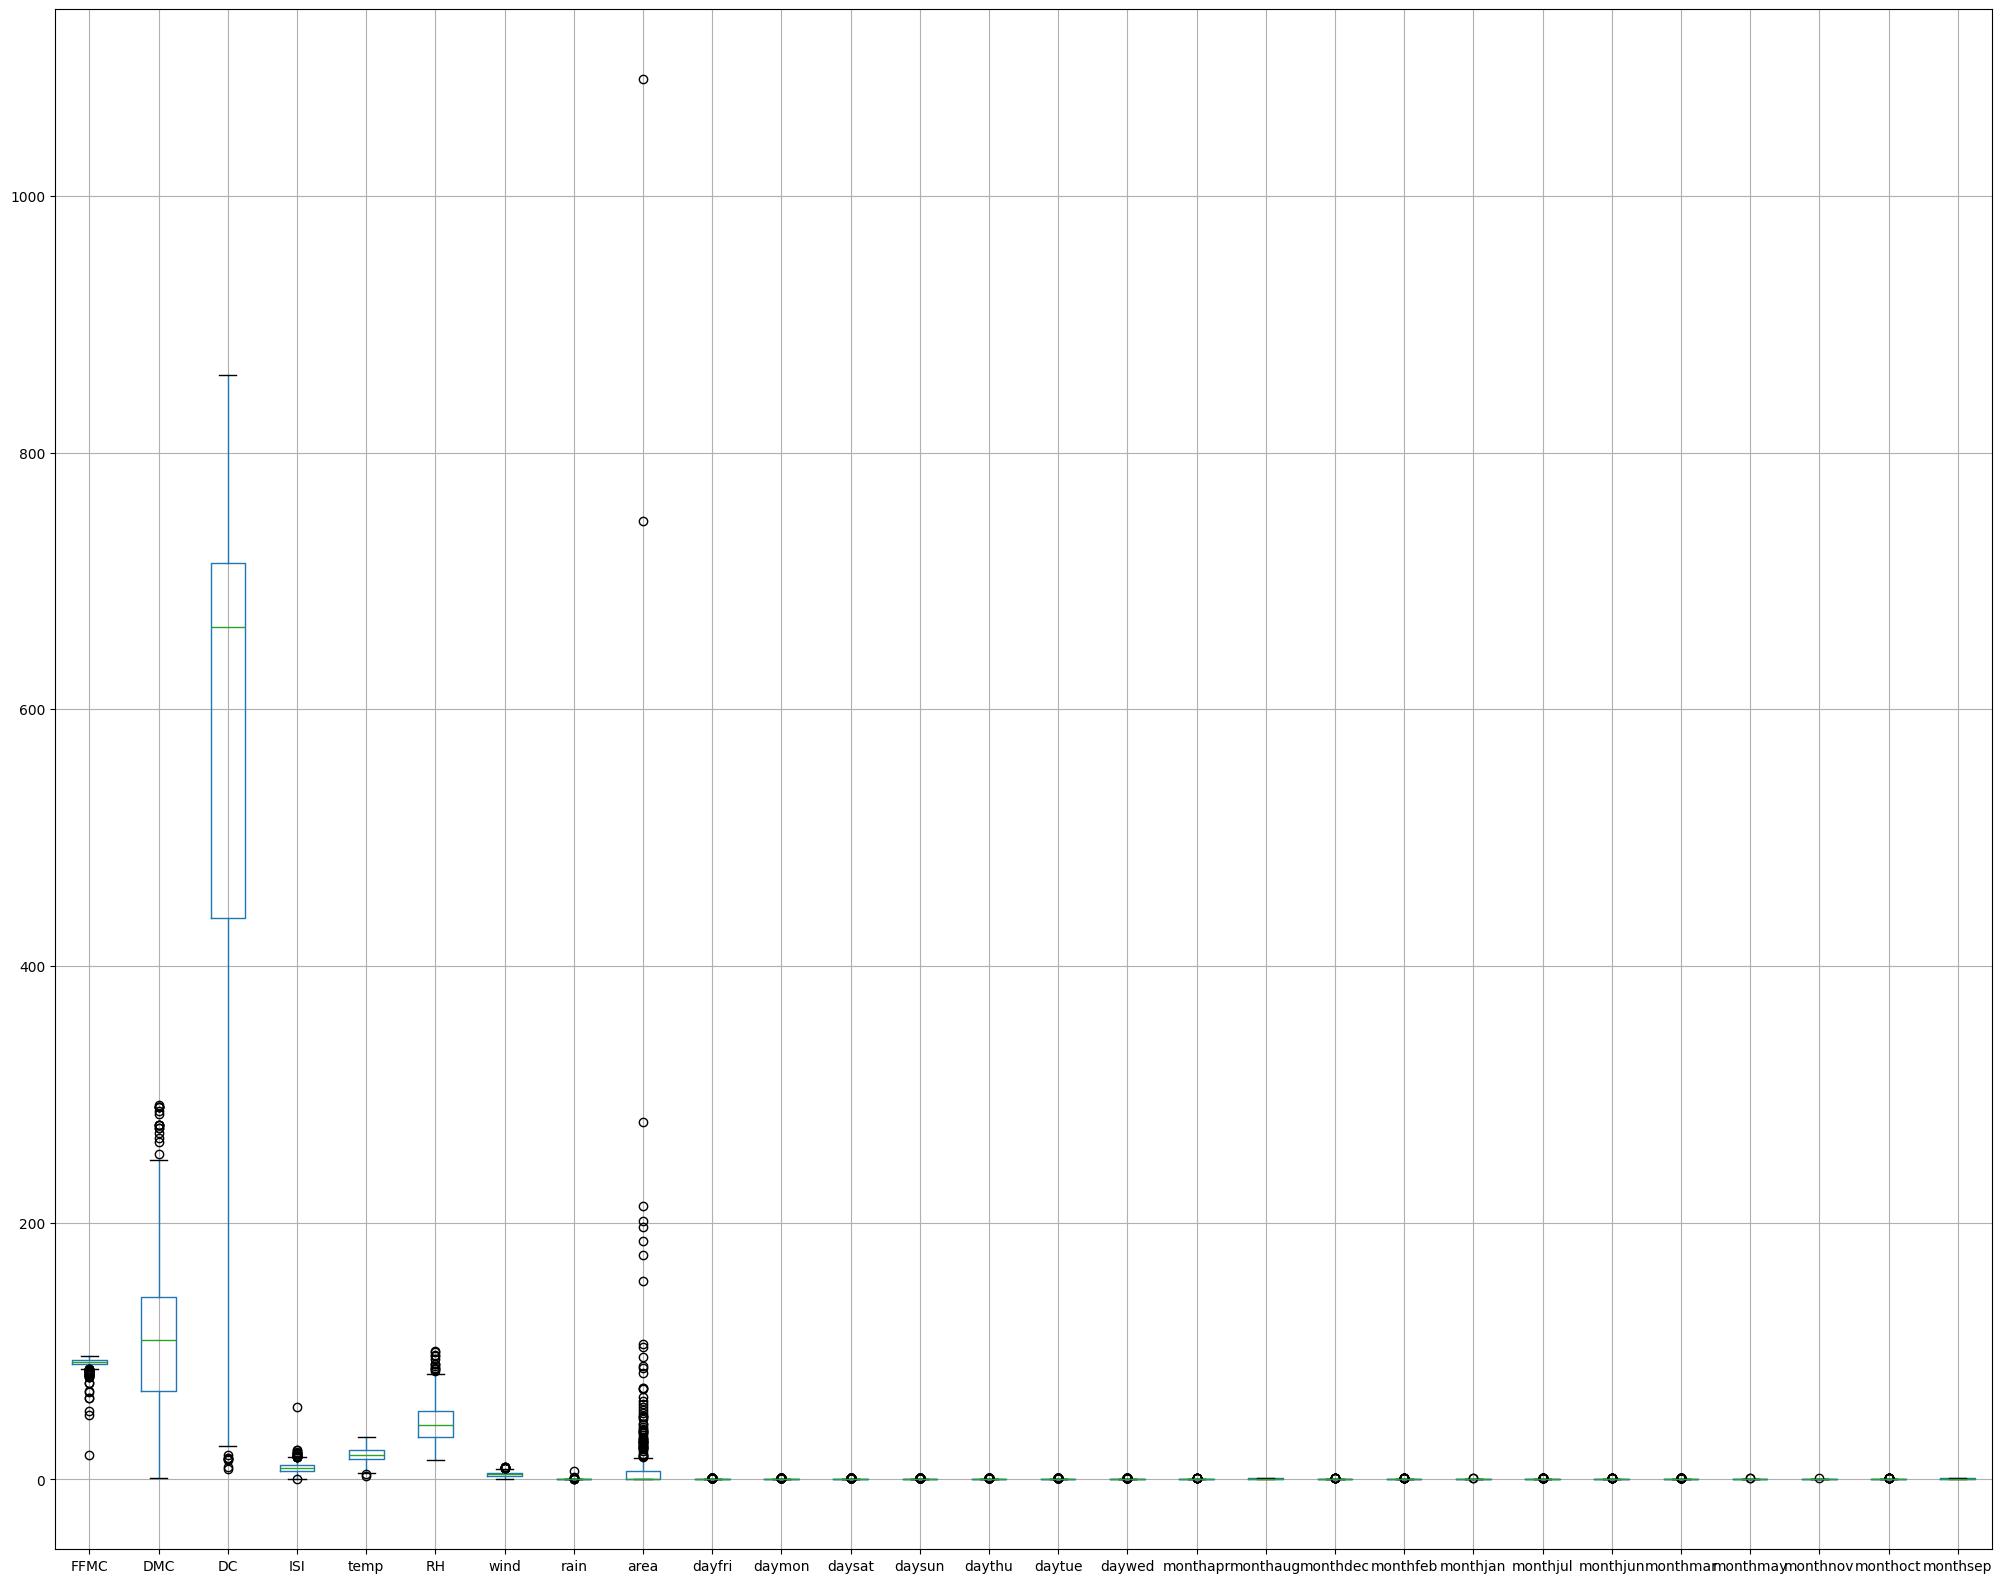

In [7]:
df.boxplot(figsize=(25,20))

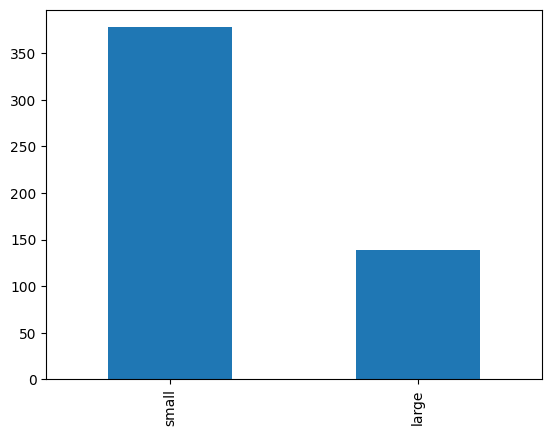

In [8]:
df['size_category'].value_counts().plot.bar()
plt.show()

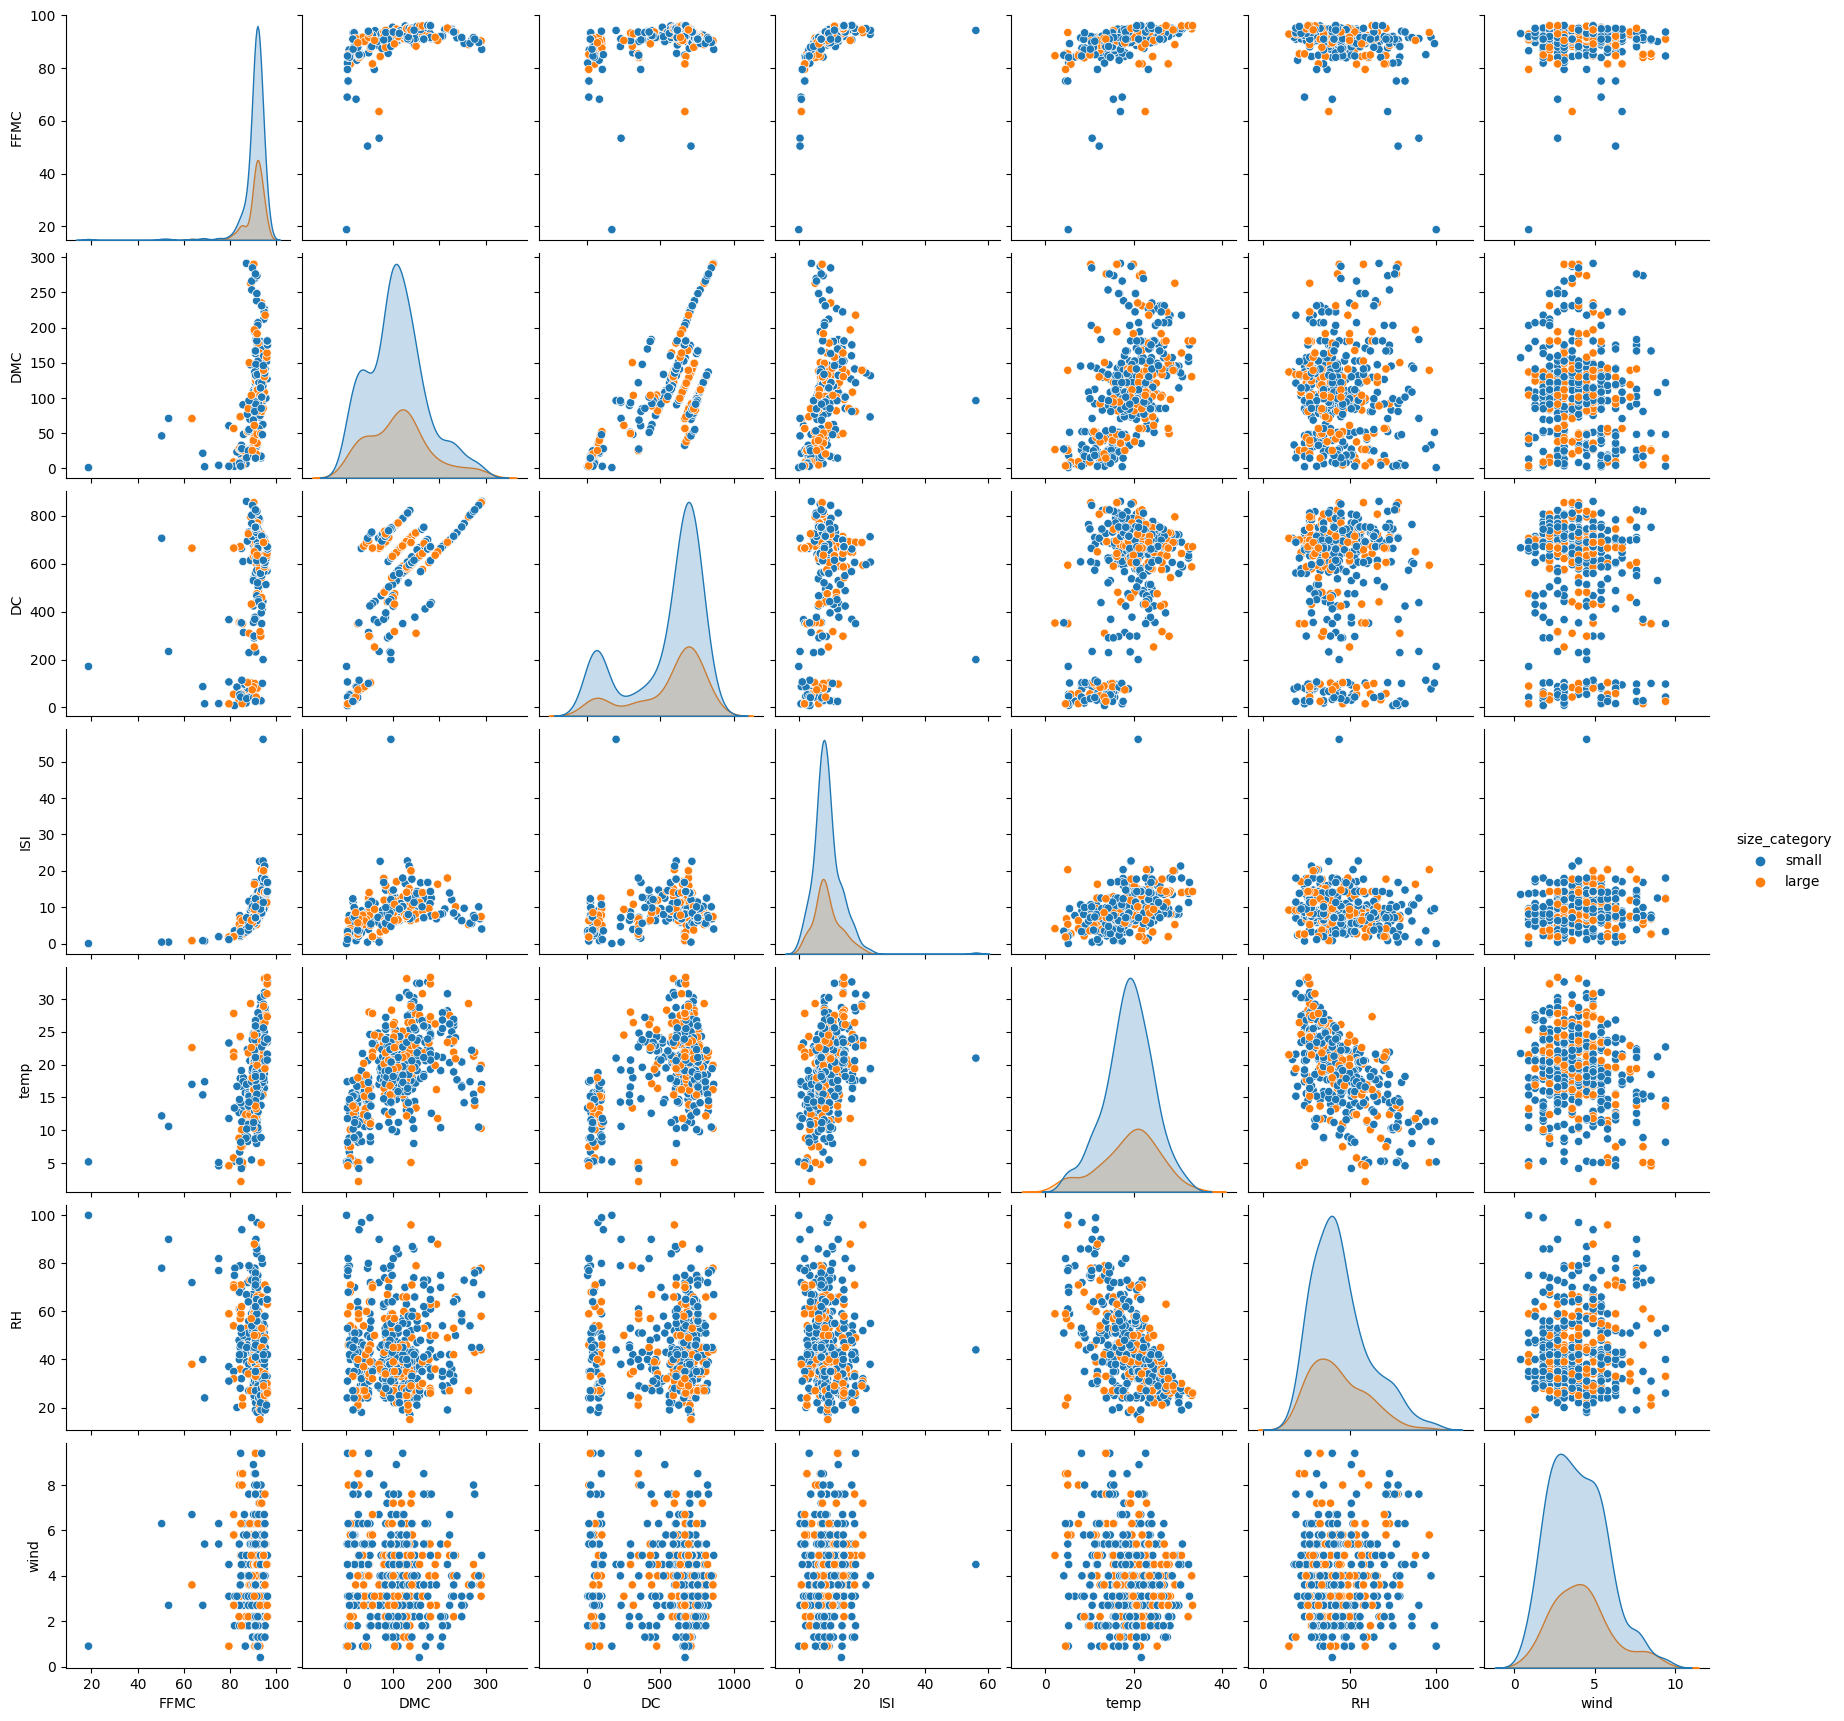

In [12]:
sns.pairplot(pd.concat([df.iloc[:,0:9],df.iloc[:,-1]],axis = 1), hue='size_category')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

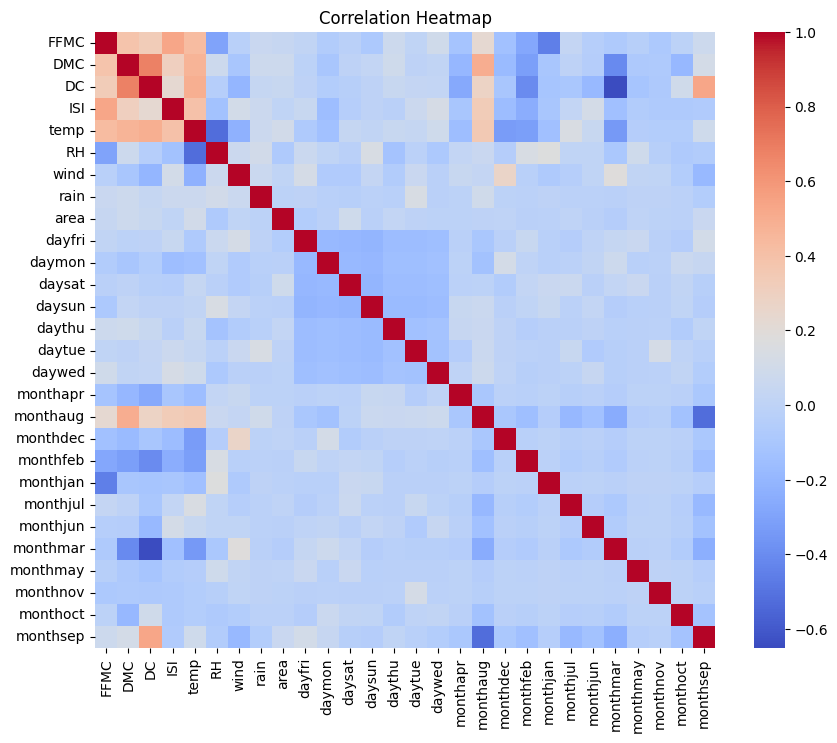

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

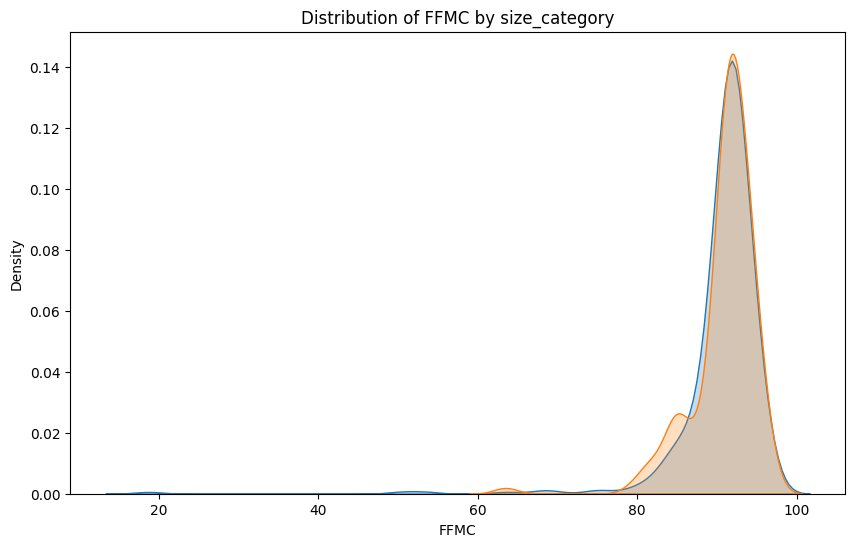

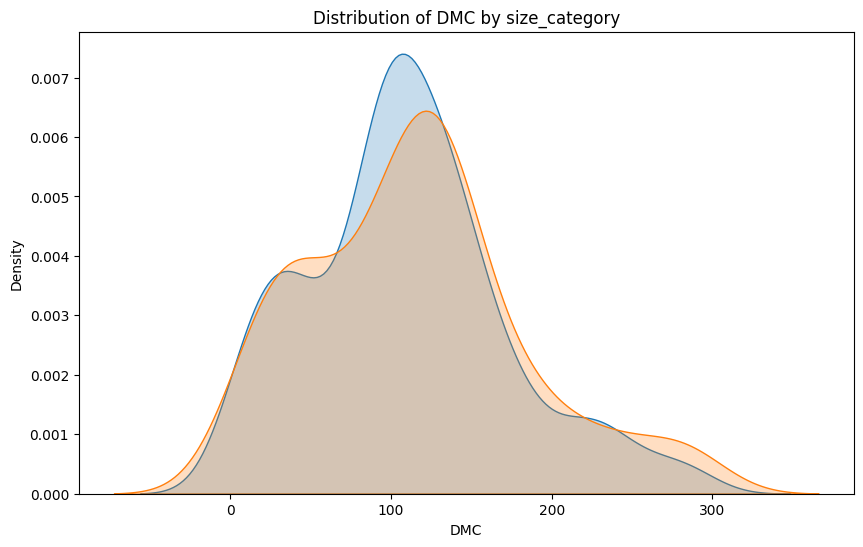

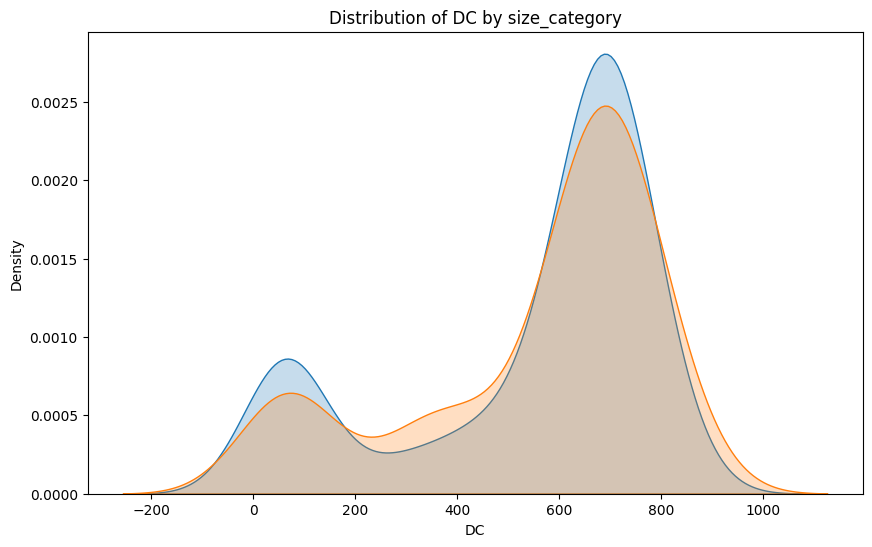

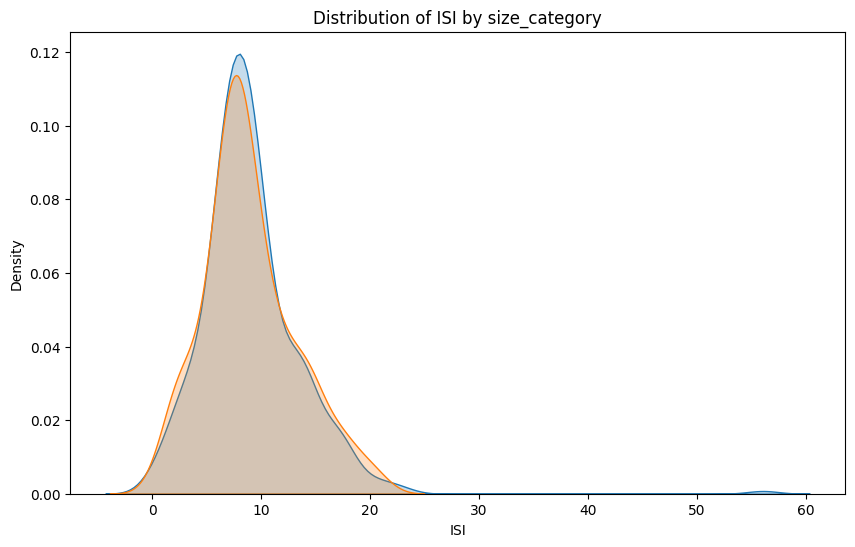

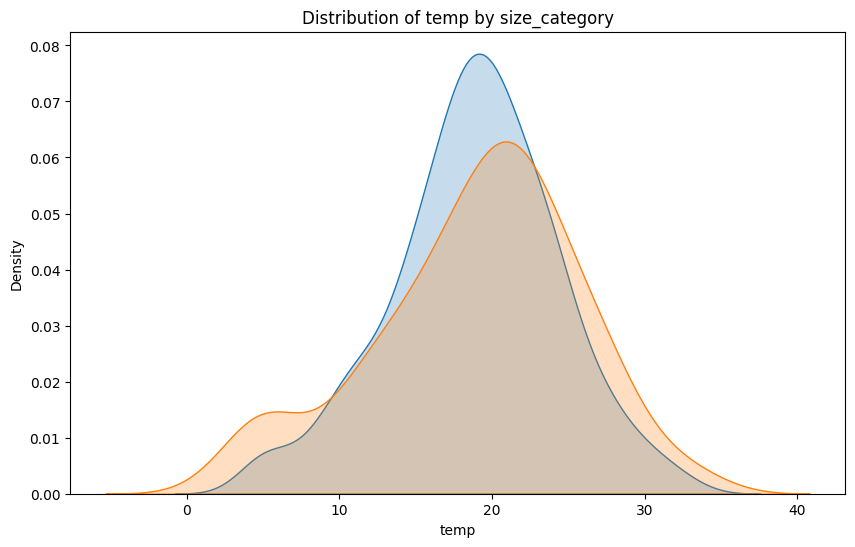

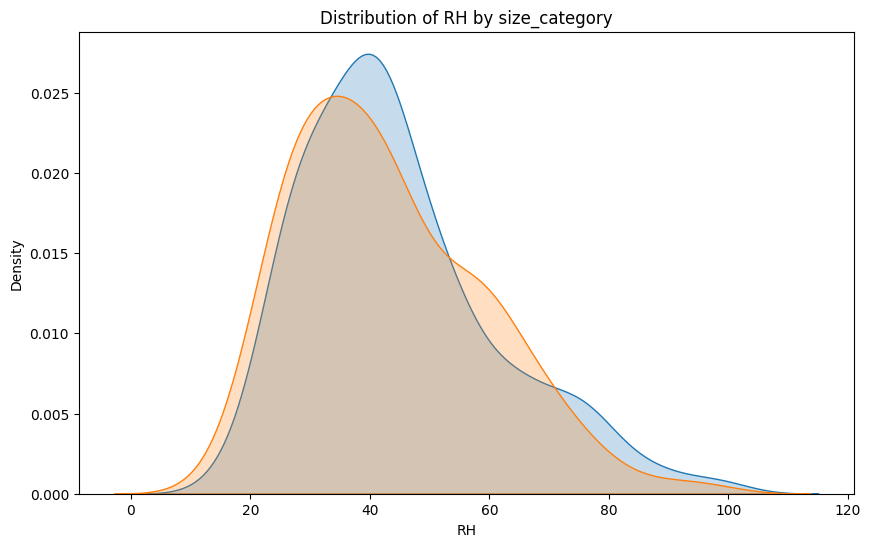

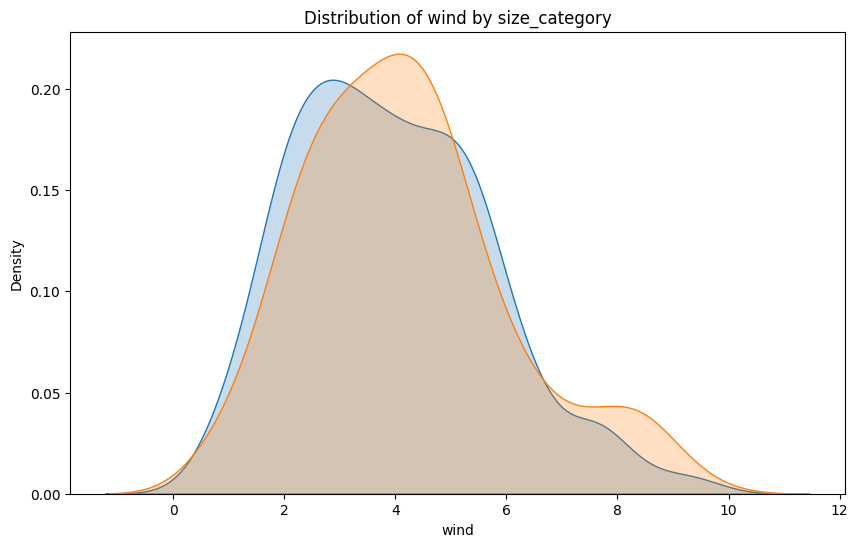

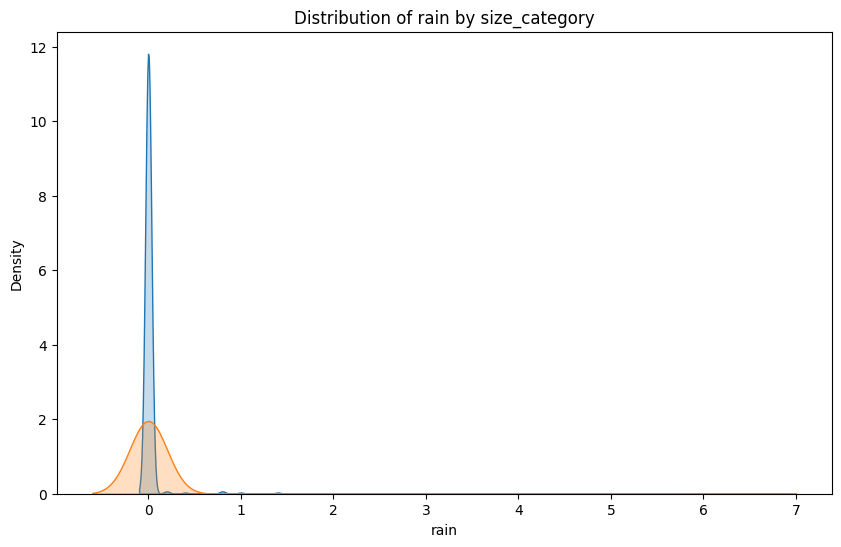

In [22]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['size_category'] == 'small'][feature], label='small', shade=True)
    sns.kdeplot(df[df['size_category'] == 'large'][feature], label='large', shade=True)
    plt.title(f'Distribution of {feature} by size_category')
    plt.show()

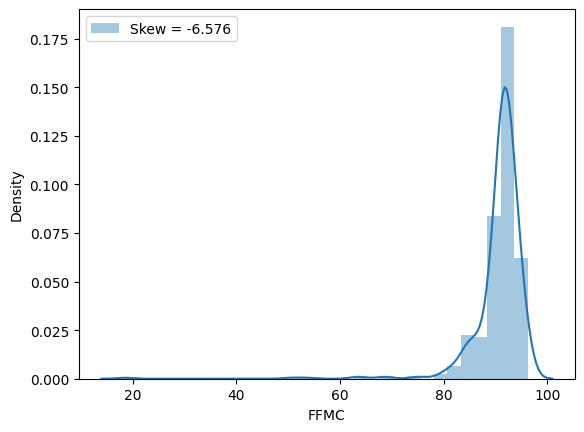

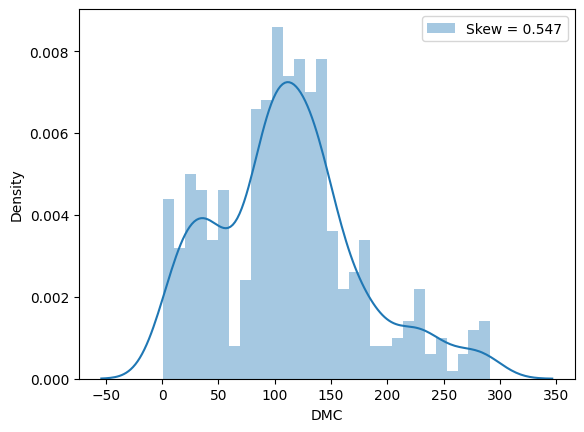

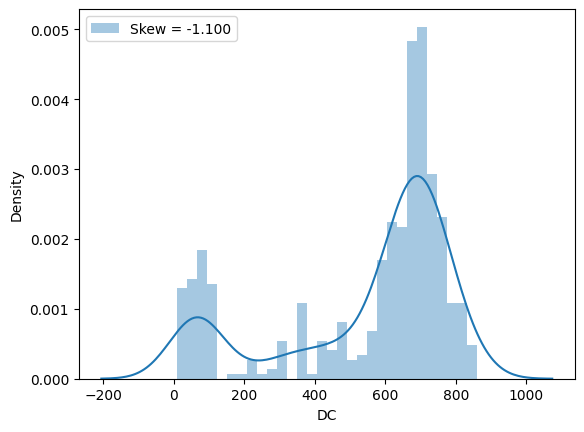

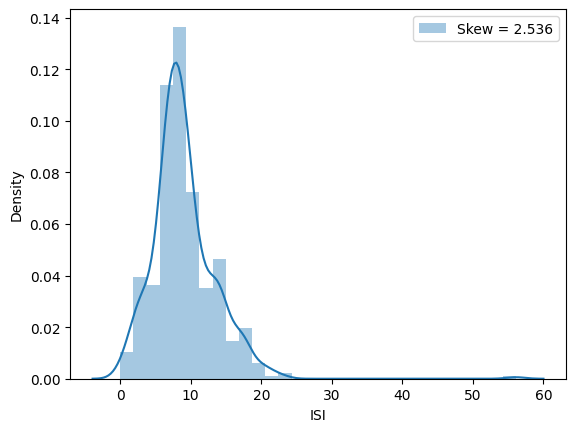

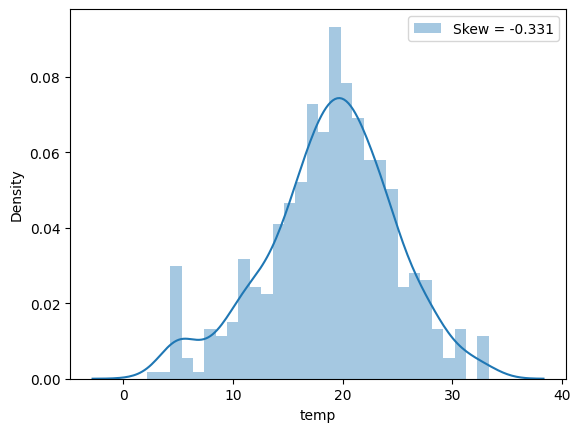

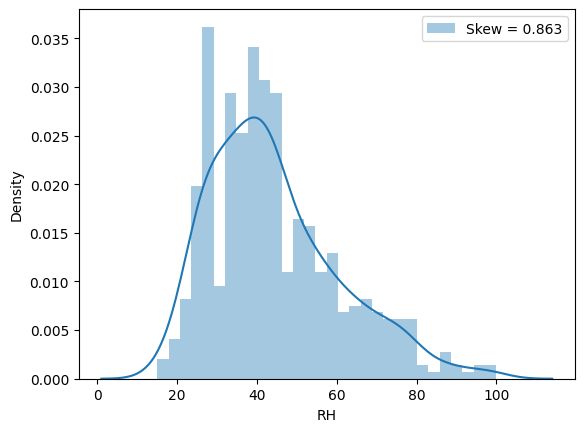

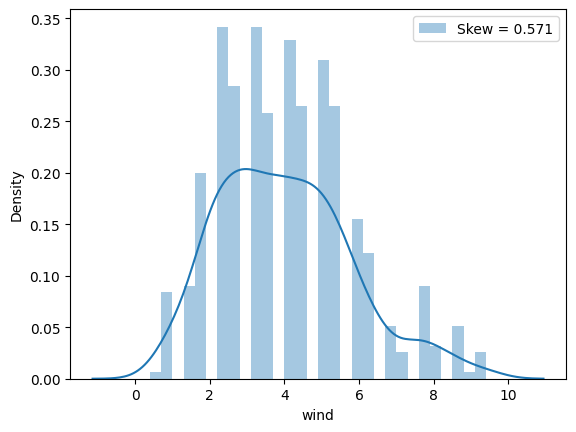

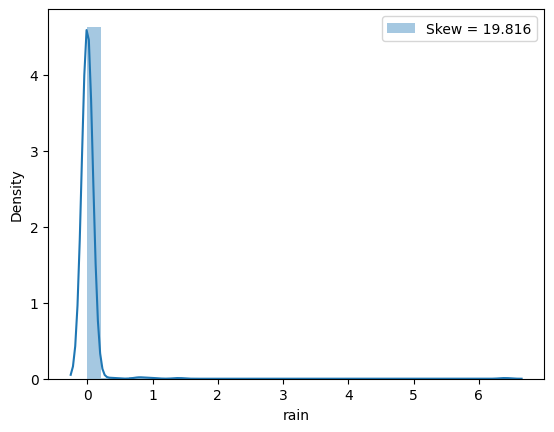

In [26]:
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Train/Test Split 

In [28]:
x = df.drop(columns=['month','day','size_category'])
y = df.iloc[:,-1]

In [29]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=36)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 28)
(156, 28)
(361,)
(156,)


In [40]:
# SVM with GridSearchCV

In [41]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [50, 5, 10, 0.5, 0.2],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             }

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix

In [43]:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

In [45]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [50, 5, 10, 0.5, 0.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [46]:
grid_search.best_params_

{'C': 1, 'gamma': 50, 'kernel': 'linear'}

In [47]:
grid_search.best_estimator_

SVC(C=1, gamma=50, kernel='linear')

In [48]:
grid_search.best_score_

0.9916666666666668

In [49]:
best_svm = grid_search.best_estimator_

In [53]:
yp_train = best_svm.predict(x_train)

In [55]:
yp_test = best_svm.predict(x_test)

In [56]:
# Accuracy

In [60]:
# for train data
print("Accuracy:",accuracy_score(y_train,yp_train))
print("Clasification:\n",classification_report(y_train,yp_train))

Accuracy: 1.0
Clasification:
               precision    recall  f1-score   support

       large       1.00      1.00      1.00       100
       small       1.00      1.00      1.00       261

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



In [61]:
# for test data
print("Accuracy:",accuracy_score(y_test,yp_test))
print("Clasification:\n",classification_report(y_test,yp_test))

Accuracy: 0.9807692307692307
Clasification:
               precision    recall  f1-score   support

       large       0.97      0.95      0.96        39
       small       0.98      0.99      0.99       117

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.98      0.98       156



[[100   0]
 [  0 261]]


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

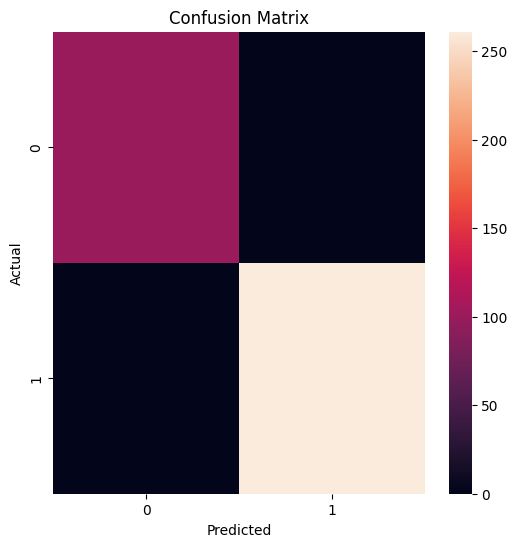

In [68]:
# confusion Matrix for Training Data
cm = confusion_matrix(y_train, yp_train)
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[ 37   2]
 [  1 116]]


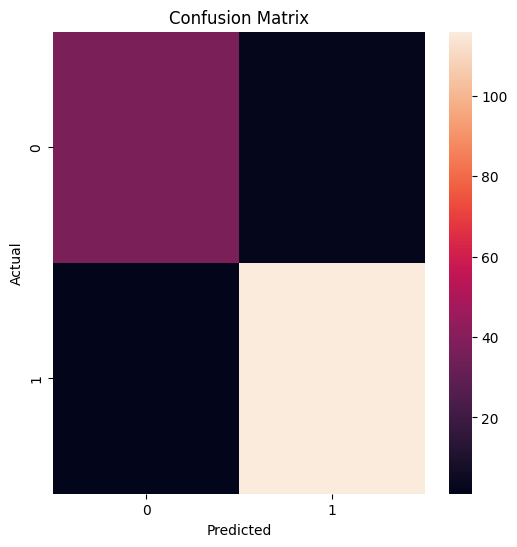

In [69]:
# confusion Matrix for Testing Data
cm = confusion_matrix(y_test, yp_test)
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()